In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


files = [
    r'path to fr-esr-parcoursup_2020.csv',
    r'path to fr-esr-parcoursup_2021.csv',
    #All the paths
]

# 
dataframes = [pd.read_csv(file, sep=';', encoding='utf-8') for file in files]

# tous les dataframes en un seul
combined_df = pd.concat(dataframes, ignore_index=True)


In [6]:
# check 1st lines
print(combined_df.head())

# 
combined_df.info()

# valeurs manquantes:
combined_df.fillna(value='Unknown', inplace=True)


   Session  \
0     2020   
1     2020   
2     2020   
3     2020   
4     2020   

  Statut de l’établissement de la filière de formation (public, privé…)  \
0                                             Public                      
1                                             Public                      
2                                             Public                      
3                                             Public                      
4                                             Public                      

  Code UAI de l'établissement                             Établissement  \
0                    0161051F  IFSI - Croix-Rouge Française - Angoulême   
1                    0171327A                         IFSI CH Saintonge   
2                    0681689S                             IFSI Rouffach   
3                    0090559J                    IFSI CH Int Val Ariège   
4                    0451147C                          IFSI CHR Orléans   

  Code départ

In [5]:
# Statistiques descriptives des colonnes numériques
print(combined_df.describe())


            Session  Effectif total des candidats pour une formation  \
count  75943.000000                                     75943.000000   
mean    2020.649434                                       833.908260   
std        1.683090                                      1384.995085   
min     2018.000000                                         0.000000   
25%     2019.000000                                       178.000000   
50%     2021.000000                                       387.000000   
75%     2022.000000                                       879.000000   
max     2023.000000                                     21829.000000   

       Dont effectif des candidates pour une formation  \
count                                     75943.000000   
mean                                        459.774304   
std                                         874.773735   
min                                           0.000000   
25%                                          56.000000   
50%

In [26]:

for col in combined_df.columns:
    print(col)


Session
Statut de l’établissement de la filière de formation (public, privé…)
Code UAI de l'établissement
Établissement
Code départemental de l’établissement
Département de l’établissement
Région de l’établissement
Académie de l’établissement
Sélectivité
Filière de formation très agrégée
Filière de formation détaillée
Filière de formation
Concours communs et banques d'épreuves
Filière de formation détaillée.1
Filière de formation très détaillée
Lien de la formation sur la plateforme Parcoursup
Coordonnées GPS de la formation
Capacité de l’établissement par formation
Effectif total des candidats pour une formation
Dont effectif des candidates pour une formation
Effectif total des candidats en phase principale
Dont effectif des candidats ayant postulé en internat
Effectif des candidats néo bacheliers généraux en phase principale
Dont effectif des candidats boursiers néo bacheliers généraux en phase principale
Effectif des candidats néo bacheliers technologiques en phase principale
Dont e

In [15]:

print(combined_df['Région de l’établissement'].isnull().sum())
print(combined_df['Taux d’accès'].isnull().sum())


0
48653


In [20]:
cleaned_df = combined_df.dropna(subset=['Région de l’établissement', 'Taux d’accès'])


C:\Users\33678\Anac\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


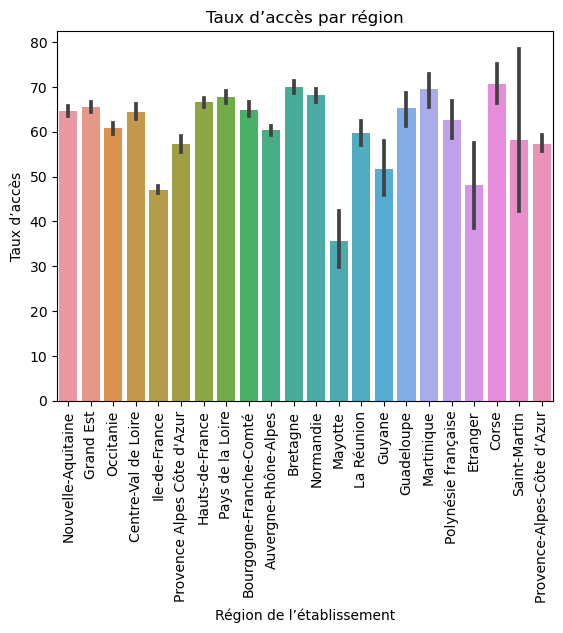

In [21]:
sns.barplot(x='Région de l’établissement', y='Taux d’accès', data=combined_df)
plt.xticks(rotation=90)  # Rotation pour une meilleure lisibilité
plt.title('Taux d’accès par région')
plt.show()


#Pas sûr d'avoir bien géré les valeurs manquantes au vu du plt en dessous!!!!

C:\Users\33678\Anac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\33678\Anac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


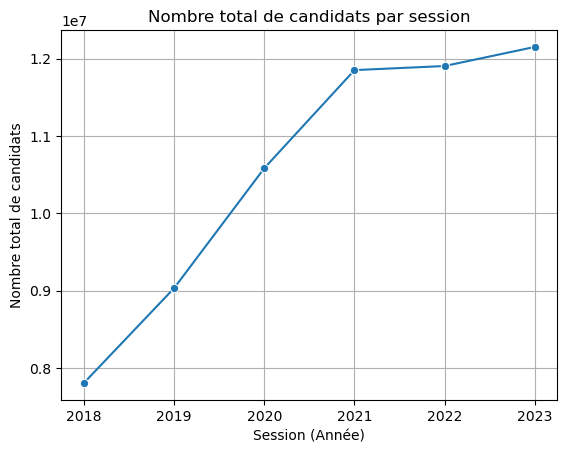

In [28]:
#  nombre tot de candidats par année
data_for_plot = combined_df.groupby('Session')['Effectif total des candidats pour une formation'].sum().reset_index()

sns.lineplot(x='Session', y='Effectif total des candidats pour une formation', data=data_for_plot, marker='o')
plt.title('Nombre total de candidats par session')
plt.xlabel('Session (Année)')
plt.ylabel('Nombre total de candidats')
plt.grid(True)
plt.show()

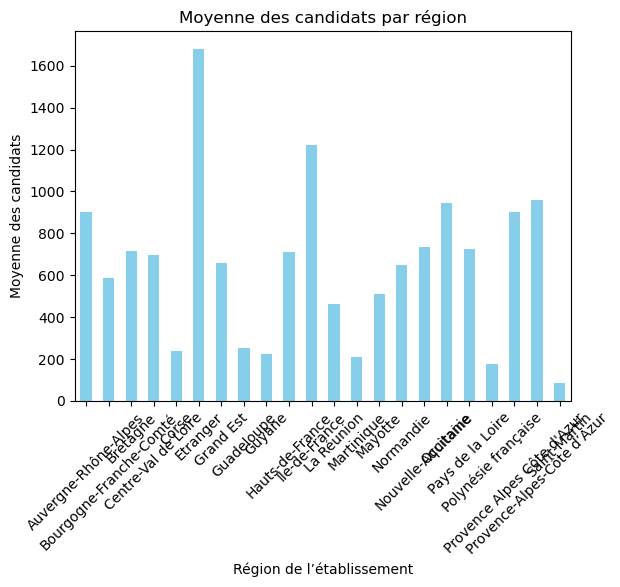

In [30]:
# Moyenne du nombre de candidats par région
region_means = combined_df.groupby('Région de l’établissement')['Effectif total des candidats pour une formation'].mean()
region_means.plot(kind='bar', color='skyblue')
plt.title('Moyenne des candidats par région')
plt.xlabel('Région de l’établissement')
plt.ylabel('Moyenne des candidats')
plt.xticks(rotation=45)
plt.show()


In [34]:
# seulement les données numériques
numeric_df = combined_df.select_dtypes(include=[np.number])


C:\Users\33678\Anac\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


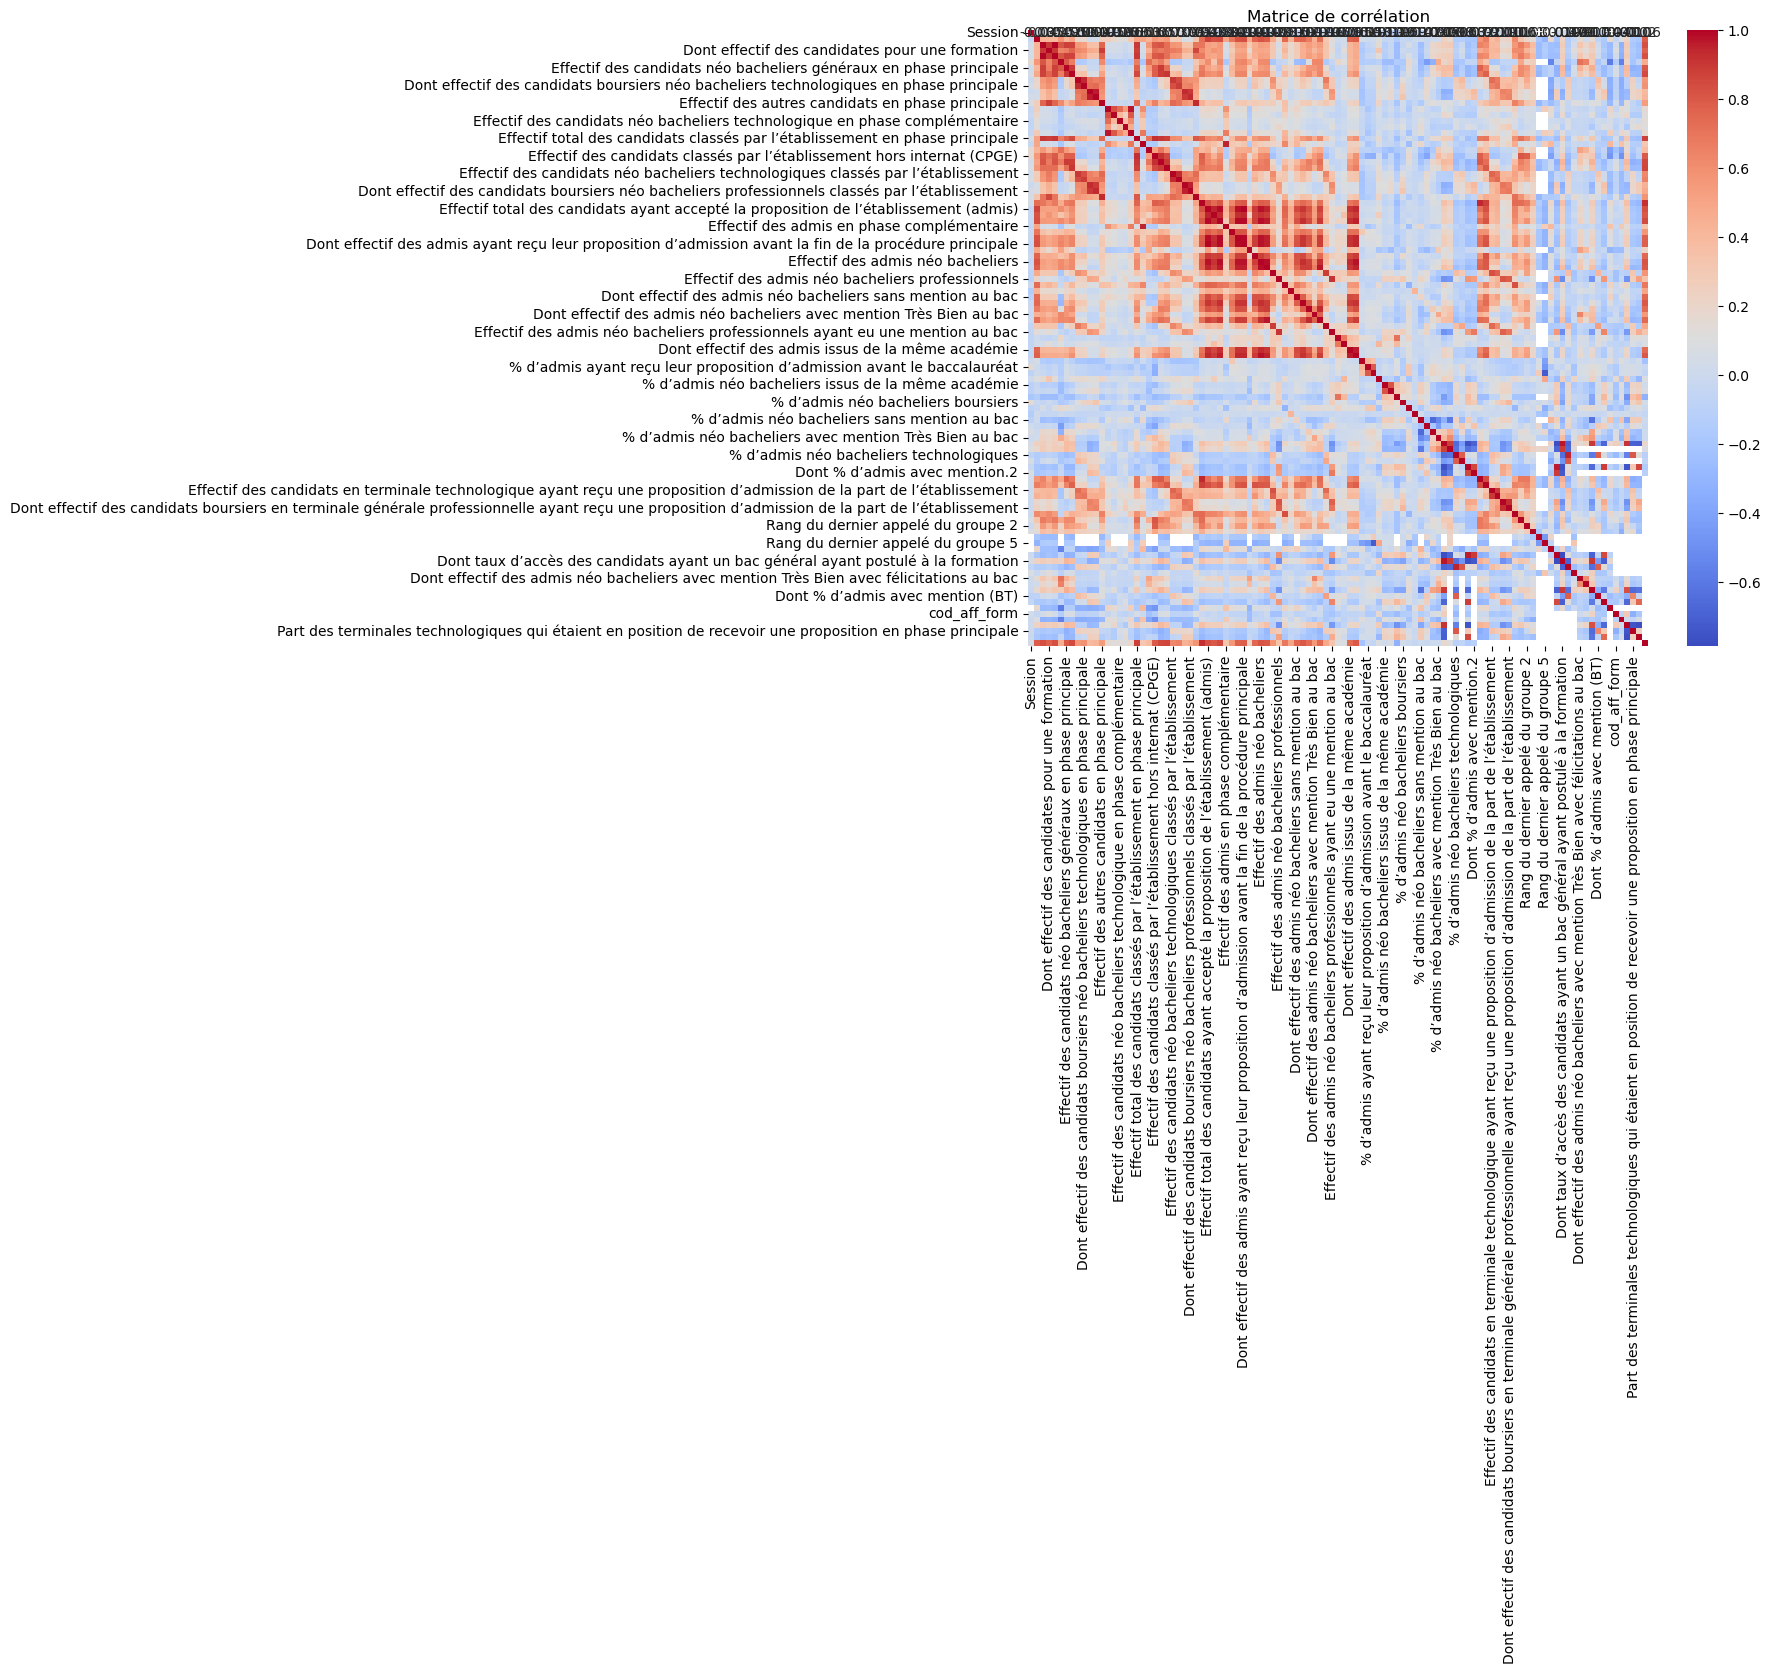

In [38]:
# matrice de corrélations calcul
correlation_matrix = numeric_df.corr()

#heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()